In [3]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df_rain = pd.read_csv('datasets/weatherAUS_clean.csv')
rain_feats = df_rain.columns.values
rain_x = df_rain[rain_feats[1:-1]]
rain_y = df_rain[rain_feats[-1]]
rain_x_tr, rain_x_te, rain_y_tr, rain_y_te = train_test_split(rain_x, rain_y, test_size=0.2)

In [5]:
# rain_norm_x = rain_x - rain_x.min()
# rain_norm_x /= (rain_norm_x.max() - rain_norm_x.min())
rain_norm_x = rain_x - rain_x.mean()
rain_norm_x_tr, rain_norm_x_te, rain_norm_y_tr, rain_norm_y_te = train_test_split(rain_norm_x, rain_y, test_size=0.2)

In [6]:
df_rain['RainTomorrow'].max()

1.0

In [7]:
rain_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
0,13.4,22.9,0.6,24.666201,7.20069,44.0,20.0,24.0,71.0,22.0,...,0.0,6.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,4.0
1,7.4,25.1,0.0,24.666201,7.20069,44.0,4.0,22.0,44.0,25.0,...,0.0,4.0,4.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0
2,12.9,25.7,0.0,24.666201,7.20069,46.0,19.0,26.0,38.0,30.0,...,0.0,4.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,4.0
3,9.2,28.0,0.0,24.666201,7.20069,24.0,11.0,9.0,45.0,16.0,...,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,6.0,0.0
4,17.5,32.3,1.0,24.666201,7.20069,41.0,7.0,20.0,82.0,33.0,...,0.0,6.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0


In [8]:
rain_norm_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_E,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W
0,1.007883,-0.542506,-1.756095,11.25839,-0.287912,3.313458,4.970112,4.79261,3.314295,-28.79899,...,-1.469488,4.437154,-1.580598,-1.514377,-1.522596,4.617571,0.618491,-1.609254,-1.443485,2.434247
1,-4.992117,1.657494,-2.356095,11.25839,-0.287912,3.313458,-11.029888,2.79261,-23.685705,-25.79899,...,-1.469488,2.437154,2.419402,-1.514377,-1.522596,0.617571,-1.381509,0.390746,-1.443485,2.434247
2,0.507883,2.257494,-2.356095,11.25839,-0.287912,5.313458,3.970112,6.79261,-29.685705,-20.79899,...,-1.469488,2.437154,-1.580598,-1.514377,-1.522596,4.617571,-1.381509,0.390746,-1.443485,2.434247
3,-3.192117,4.557494,-2.356095,11.25839,-0.287912,-16.686542,-4.029888,-10.20739,-22.685705,-34.79899,...,1.530512,-1.562846,-1.580598,1.485623,1.477404,-1.382429,-1.381509,-1.609254,4.556515,-1.565753
4,5.107883,8.857494,-1.356095,11.25839,-0.287912,0.313458,-8.029888,0.79261,14.314295,-17.79899,...,-1.469488,4.437154,0.419402,-1.514377,2.477404,-1.382429,1.618491,-1.609254,-1.443485,1.434247


In [11]:
df_rain.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_E,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_E,WindDir3pm_W,RainTomorrow
count,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.00000,121790.000000,...,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000
mean,74095.334387,12.392117,23.442506,2.356095,13.407811,7.488602,40.686542,15.029888,19.20739,67.685705,...,1.562846,1.580598,1.514377,1.522596,1.382429,1.381509,1.609254,1.443485,1.565753,0.220741
std,41444.123102,6.336322,7.140863,8.482433,9.921268,2.807379,13.390520,8.321005,8.58712,19.058076,...,1.966491,2.016462,1.929320,1.924537,1.872716,1.882703,1.942573,1.882713,1.961487,0.414748
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39000.250000,7.800000,18.100000,0.000000,4.000000,7.200690,31.000000,9.000000,13.00000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74667.500000,12.200000,23.000000,0.000000,9.000000,7.200690,39.000000,13.000000,19.00000,69.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,107891.750000,17.000000,28.500000,0.800000,24.666201,9.100000,48.000000,20.000000,24.00000,82.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
max,145458.000000,33.900000,48.100000,367.600000,82.400000,14.500000,135.000000,87.000000,87.00000,100.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [10]:
rain_feats

array(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_E', 'WindGustDir_W',
       'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_E', 'WindDir9am_W',
       'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_E', 'WindDir3pm_W',
       'RainTomorrow'], dtype=object)

In [12]:
rain_y_te_true = rain_y_te[rain_y_te == 1]
rain_x_te_true = rain_x_te[rain_y_te == 1]
rain_y_te_false = rain_y_te[rain_y_te == 0]
rain_x_te_false = rain_x_te[rain_y_te == 0]
rain_norm_y_te_true = rain_norm_y_te[rain_norm_y_te == 1]
rain_norm_x_te_true = rain_norm_x_te[rain_norm_y_te == 1]
rain_norm_y_te_false = rain_norm_y_te[rain_norm_y_te == 0]
rain_norm_x_te_false = rain_norm_x_te[rain_norm_y_te == 0]

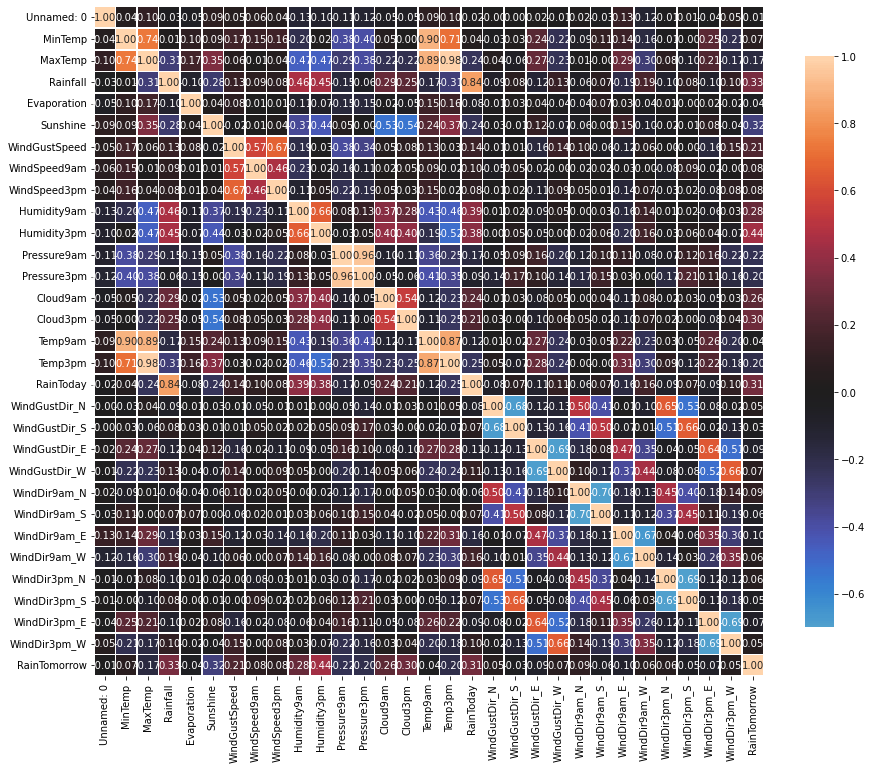

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(train):
    correlations = train.corr(method='spearman')

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_rain)

In [17]:
correlations = df_rain.corr()

In [34]:
high_corr = {}
for col_name, col in correlations.items():
    for row_name, entry in col.items():
        if np.abs(entry) > 0.5 and entry < 1:
            name = col_name+' '+row_name if col_name < row_name else row_name+' '+col_name
            high_corr[name] = entry
for name, corr in high_corr.items():
    n1, n2 = name.split()
    print(n1, '\t', n2, '\t', ':', corr)

MaxTemp 	 MinTemp 	 : 0.7352081161633852
MinTemp 	 Temp9am 	 : 0.8977394397058824
MinTemp 	 Temp3pm 	 : 0.7113006820265526
Humidity9am 	 MaxTemp 	 : -0.5118902947452983
Humidity3pm 	 MaxTemp 	 : -0.5140358424647493
MaxTemp 	 Temp9am 	 : 0.8906287775578801
MaxTemp 	 Temp3pm 	 : 0.9848258309552419
RainToday 	 Rainfall 	 : 0.5010523345843898
Cloud9am 	 Sunshine 	 : -0.5580393727873786
Cloud3pm 	 Sunshine 	 : -0.5719194908036179
WindGustSpeed 	 WindSpeed9am 	 : 0.5921157376289905
WindGustSpeed 	 WindSpeed3pm 	 : 0.6772230801264321
WindSpeed3pm 	 WindSpeed9am 	 : 0.504776014363461
Humidity3pm 	 Humidity9am 	 : 0.6825523892516111
Humidity9am 	 Temp3pm 	 : -0.5039827514126349
Humidity3pm 	 Temp3pm 	 : -0.562004186189701
Pressure3pm 	 Pressure9am 	 : 0.9604938375151988
Cloud3pm 	 Cloud9am 	 : 0.571054587673759
Temp3pm 	 Temp9am 	 : 0.8663414223245417
WindGustDir_N 	 WindGustDir_S 	 : -0.595966152542061
WindDir3pm_N 	 WindGustDir_N 	 : 0.6428425065115904
WindDir3pm_S 	 WindGustDir_S 	 : 0.64184